In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [82]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, recall_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
import numpy as np
import seaborn as sns


# Load dataset

In [43]:
data_path ='/content/drive/My Drive/veri-seti.txt'


In [44]:
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(data_path, header=None, names=column_names, delimiter='\t')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Cleaning

In [45]:
# Replace zeros with NaN
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_to_replace] = data[columns_to_replace].replace(0, np.nan)

In [46]:
# Fill NaN values with column mean
data.fillna(data.mean(), inplace=True)


In [59]:
# Remove outliers
for col in data.select_dtypes(include=[np.number]).columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

In [60]:
# Split data into features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']


#Split Data and Normalize

In [49]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [61]:
# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Initialize models

In [62]:
models = {
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(max_iter=1000),
    'SVM': SVC(probability=True)
}


#Train and evaluate models

In [63]:
# Function to evaluate a model
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    specificity = confusion_matrix(y_test, y_pred)[0, 0] / (confusion_matrix(y_test, y_pred)[0, 0] + confusion_matrix(y_test, y_pred)[0, 1])
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)
    mse = mean_squared_error(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

    results = {
        'accuracy': accuracy,
        'recall': recall,
        'specificity': specificity,
        'f1_score': f1,
        'auc': auc,
        'mse': mse,
        'confusion_matrix': cm,
        'fpr': fpr,
        'tpr': tpr
    }

    return results

In [64]:
# Evaluate models
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_train, X_test, y_train, y_test, name)
    print(f"Confusion Matrix for {name}:\n{results[name]['confusion_matrix']}\n")

Confusion Matrix for Naive Bayes:
[[73 20]
 [20 26]]

Confusion Matrix for KNN:
[[76 17]
 [26 20]]

Confusion Matrix for MLP:
[[78 15]
 [24 22]]

Confusion Matrix for SVM:
[[77 16]
 [23 23]]



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [66]:
results_df = pd.DataFrame({model: {metric: results[model][metric] for metric in ['accuracy', 'recall', 'specificity', 'f1_score', 'auc', 'mse']} for model in models})
print(results_df)

             Naive Bayes       KNN       MLP       SVM
accuracy        0.712230  0.690647  0.719424  0.719424
recall          0.565217  0.434783  0.478261  0.500000
specificity     0.784946  0.817204  0.838710  0.827957
f1_score        0.565217  0.481928  0.530120  0.541176
auc             0.763441  0.757948  0.755961  0.760636
mse             0.287770  0.309353  0.280576  0.280576


SVM ve MLP algoritmaları doğruluk açısından en iyi performansı göstermektedir.

Naive Bayes en yüksek duyarlılığa sahiptir, bu da pozitif örnekleri daha iyi tanımlama yeteneğine sahip olduğunu gösterir.

 KNN algoritması en yüksek özgüllüğe sahiptir, bu da negatif örnekleri daha iyi tanımlama yeteneğine sahip olduğunu gösterir.
  
 Naive Bayes en yüksek F1 skoruna sahiptir, bu da duyarlılık ve doğruluk arasında daha iyi bir denge olduğunu gösterir.
   
 Naive Bayes en iyi AUC değerine sahiptir, bu da pozitif ve negatif örnekleri doğru bir şekilde tanımlama yeteneğinin daha iyi olduğunu gösterir.

MLP ve SVM algoritmaları en düşük MSE değerlerine sahiptir, bu da tahminlerde daha az hata olduğunu gösterir.
    
 Genel olarak, Naive Bayes duyarlılık, F1 skoru ve AUC açısından en iyi performansı gösterirken, SVM ve MLP algoritmaları doğruluk ve MSE açısından iyi performans sergilemektedir. KNN algoritması en yüksek özgüllüğe sahip olmakla birlikte, diğer metriklerde daha zayıf performans göstermektedir.

#Plot ROC curves

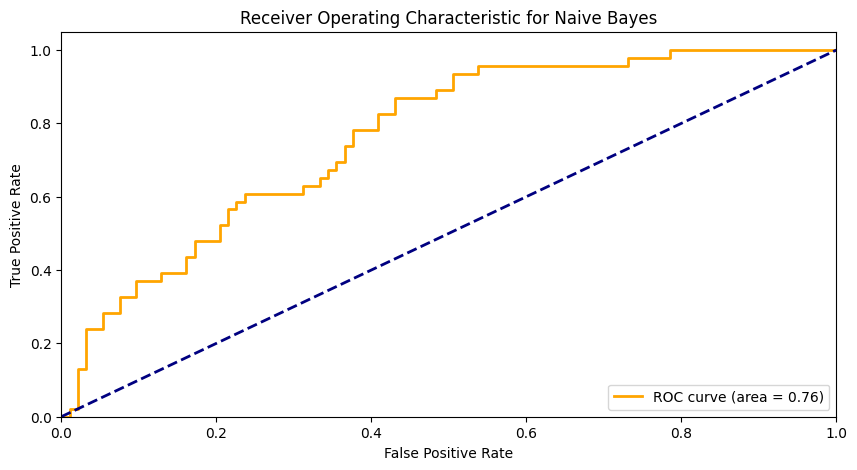

In [85]:
# Naive Bayes
probs_nb = models['Naive Bayes'].predict_proba(X_test)
fpr_nb, tpr_nb, _ = roc_curve(y_test, probs_nb[:, 1])
roc_auc_nb = roc_auc_score(y_test, probs_nb[:, 1])

plt.figure(figsize=(10, 5))
plt.plot(fpr_nb, tpr_nb, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Naive Bayes')
plt.legend(loc="lower right")
plt.show()


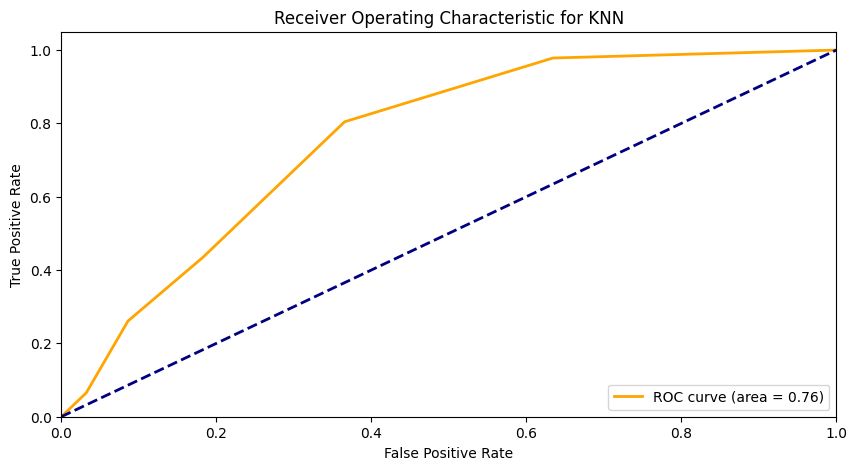

In [87]:
# KNN
probs_knn = models['KNN'].predict_proba(X_test)
fpr_knn, tpr_knn, _ = roc_curve(y_test, probs_knn[:, 1])
roc_auc_knn = roc_auc_score(y_test, probs_knn[:, 1])

plt.figure(figsize=(10, 5))
plt.plot(fpr_knn, tpr_knn, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for KNN')
plt.legend(loc="lower right")
plt.show()


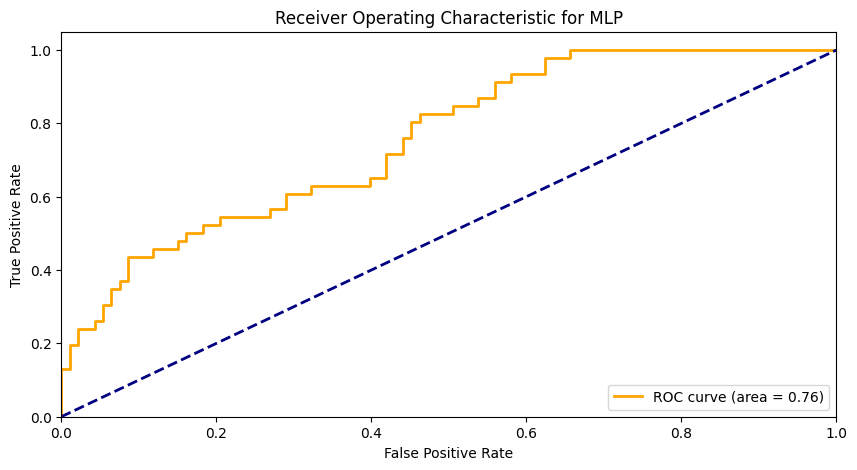

In [88]:
# MLP
probs_mlp = models['MLP'].predict_proba(X_test)
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, probs_mlp[:, 1])
roc_auc_mlp = roc_auc_score(y_test, probs_mlp[:, 1])

plt.figure(figsize=(10, 5))
plt.plot(fpr_mlp, tpr_mlp, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_mlp)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for MLP')
plt.legend(loc="lower right")
plt.show()


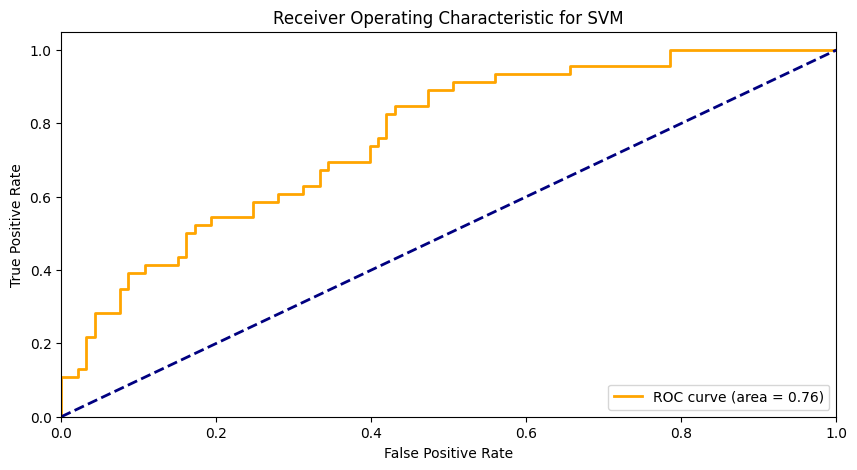

In [89]:
# SVM
probs_svm = models['SVM'].predict_proba(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, probs_svm[:, 1])
roc_auc_svm = roc_auc_score(y_test, probs_svm[:, 1])

plt.figure(figsize=(10, 5))
plt.plot(fpr_svm, tpr_svm, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for SVM')
plt.legend(loc="lower right")
plt.show()


İncelenen tüm algoritmalar (Naive Bayes, KNN, MLP ve SVM) AUC (Eğri Altındaki Alan) değeri 0.76 olan benzer performanslar sergilemektedir ve bu modellerin diyabet tanısında benzer yeteneklere sahip olduğunu göstermektedir. Bu AUC değeri, modellerin pozitif (diyabetli) ve negatif (diyabetsiz) sınıflarını nispeten iyi ayırt etme yeteneğine sahip olduğunu ifade eder, ancak modellerin doğruluğunu ve verimliliğini artırmak için hala geliştirme ve iyileştirme alanları vardır.

# Plot the metrics

In [72]:
models_list = ['Naive Bayes', 'KNN', 'MLP', 'SVM']
metrics = ['accuracy', 'recall', 'specificity', 'f1_score', 'auc', 'mse']
colors = ['orange', 'blue', 'green', 'purple', 'red', 'cyan']

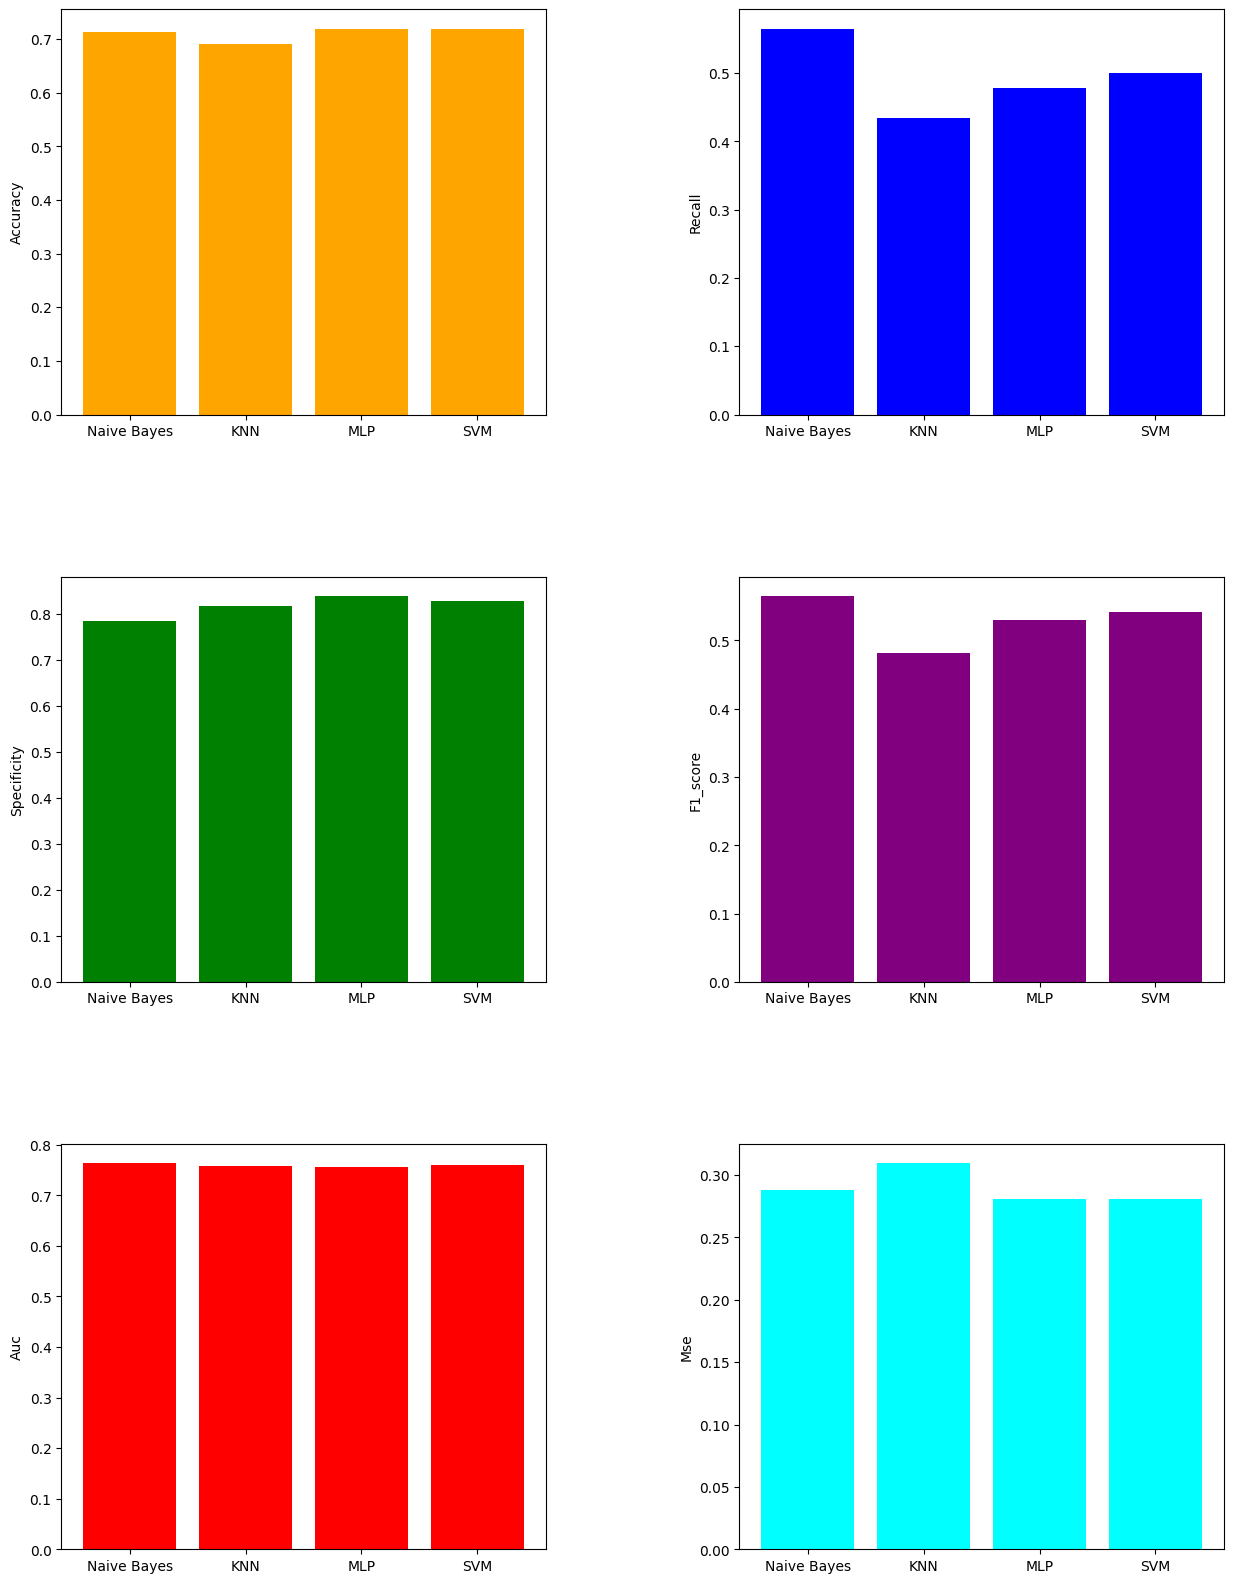

In [76]:
fig, axs = plt.subplots(3, 2, figsize=(15, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    values = [results[model][metric] for model in models_list]
    axs[row, col].bar(models_list, values, color=colors[i])
    axs[row, col].set_ylabel(metric.capitalize())

plt.show()
